In [10]:
from CSOWP_SR import *
from ExpressionTree import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

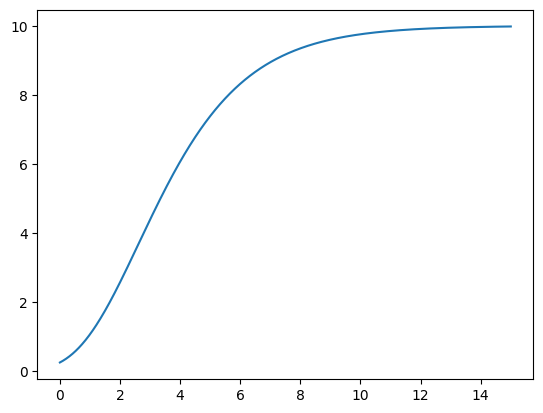

In [11]:
def func(x):
    a=10
    b=-0.5
    c=-0.5
    d=2
    return a*np.exp(b*np.exp(c*x + d))

scaler = MinMaxScaler((0,1))
X_norm = scaler.fit_transform(np.c_[X])
y_norm = scaler.fit_transform(np.c_[y]).reshape(-1, )

X = np.linspace(0, 15, 1000)
y = func(X)
plt.plot(X, y)
plt.show()

In [27]:
SR = SymbolicRegression(3, max_expression_size=3, max_population_size=200, max_island_count=10, random_const_range=(-10, 10))
SR.fit(X_norm, y_norm, feature_names = ["x"])
tree = SR.predict()

D:\Documents\Coding\Repositorios\MyRepositories\Symbolic-Regression\CSOWP_SR\algorithms\CSOWP_SR.py:105: RuntimeWarning: invalid value encountered in subtract
  self._operators_func = {"+": lambda a,b: np.add(a,b), "-": lambda a,b: np.subtract(a,b),
D:\Documents\Coding\Repositorios\MyRepositories\Symbolic-Regression\CSOWP_SR\algorithms\CSOWP_SR.py:105: RuntimeWarning: invalid value encountered in add
  self._operators_func = {"+": lambda a,b: np.add(a,b), "-": lambda a,b: np.subtract(a,b),


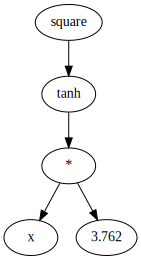

In [35]:
expr_tree = ExpressionTree()
p = expr_tree.add_root("square")
p = expr_tree.add_left(p, "tanh")
p = expr_tree.add_left(p, "*")
expr_tree.add_left(p, "x")
expr_tree.add_right(p, 3.762)
expr_tree.visualize_tree()

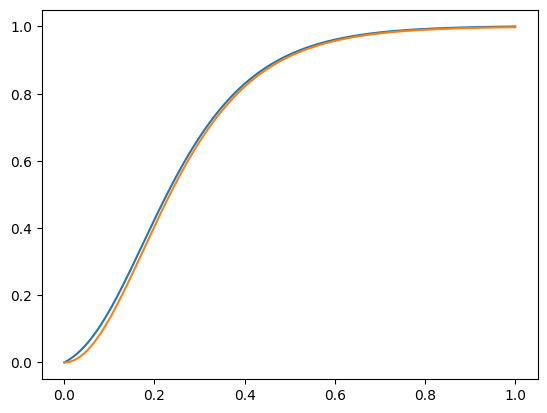

In [38]:
plt.plot(X_norm, y_norm)
plt.plot(X_norm, SR.evaluate_tree(expr_tree))
plt.show()

In [48]:
func, expr = expr_tree.toFunc(SR._operators, SR._functions, SR._feature_names, inv_data={
    "Xmin": X.min(),
    "Xmax": X.max(),
    "ymin": y.min(),
    "ymax": y.max()
})
expr

9.73099517372898*square(tanh(0.2508*x)) + 0.248591831991941

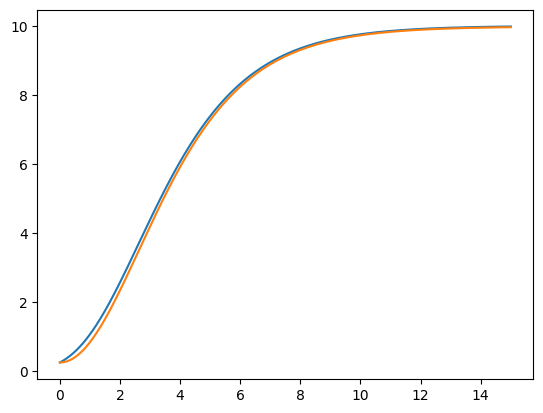

In [50]:
plt.plot(X, y)

plt.plot(X, func(X))
plt.show()